Kristen Swerzenski

DSC 550 Data Mining

19 May 2024

## Project Milestone 1

### Introduction

Climate change has become one of the most pressing and complex challenges to humanity that has emerged in recent years. With its rapidly increasing potential to impact just about every facet of modern society including human health, infrastructure, resource availability, and even business practices, there is increased pressure and interest by many different stakeholders to develop effective policies and strategies to mitigate its impacts. However, while there has been a huge focus on the actions we need to take to mitigate climate change’s effects, there had been significantly less of a focus on how we go about doing so, particularly when it comes to garnering support from public to adopt behaviors and support legislation/business practices that lends to climate-positive initiatives.

Between highly politicized discourse, lack of understanding and education, and the volume of misleading information that is easily available, climate change has become a hotly debated topic that elicits very passionate responses from many different groups of people. Despite this, many countries are beginning to adopt strict regulations for businesses when it comes to the impacts of business activities on both climate change and biodiversity loss. Because of this, there is an extremely high demand particularly from businesses impacted by these regulations on how to align their practices with these new standards while having positive impacts on their consumers in such a contentious space. Understanding public perceptions of climate change is crucial to develop effective communication strategies, inform evidence-based decision making, and implement policies that meet the diverse needs and concerns of different communities. By gaining insights into the varying attitudes, beliefs, and levels of awareness surrounding climate change, businesses and other stakeholders can tailor actions that promote widespread engagement, foster climate and biodiversity resilience, and drive collective action towards sustainable solutions while minimizing negative effects on their consumer base (and in best cases, even creating positive effects on their consumers). 

For this project, I will be using a dataset from the Yale Program on Climate Change Communication that contains thousands of survey responses from Americans from 2008-2022 about their opinions and behaviors regarding climate change (https://osf.io/jw79p/?utm_source=Yale+Program+on+Climate+Change+Communication&utm_campaign=4de07345f2-EMAIL_CAMPAIGN_2023_01_20_03_34&utm_medium=email&utm_term=0_de6cdfce82-4de07345f2-%5BLIST_EMAIL_ID%5D). I plan to use this data to identify a number of demographic characteristics that may influence a person's attitudes towards climate change, particularly for individuals who show more denial or lack of support for climate positive initiatives. I hope to be able to build a model to predict who is more likely to be of this mindset, and conversely who might be most likely to show support of climate initiatives.

### The Data

In [1]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting data frame to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Reading in the climate data and checking the data frame
filename = 'CCAM SPSS Data 2008-2022.sav'  # Replace with the path to your .sav file
climate_df = pd.read_spss(filename)
climate_df.head(10)

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,worry,harm_personally,harm_US,harm_dev_countries,harm_future_gen,harm_plants_animals,when_harm_US,reg_CO2_pollutant,reg_utilities,fund_research,reg_coal_emissions,discuss_GW,hear_GW_media,gender,age,age_category,generation,educ,educ_category,income,income_category,race,ideology,party,party_w_leaners,party_x_ideo,registered_voter,region9,region4,religion,religion_other_nonchristian,evangelical,service_attendance,marit_status,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.269626,Yes,Caused mostly by human activities,,Caused mostly by human activities,Most scientists think global warming is happening,Somewhat worried,Only a little,A moderate amount,A great deal,A great deal,A great deal,In 10 years,Strongly support,Strongly support,Strongly support,NaN,Occasionally,NaN,Female,78.0,55+ years,Silent (1928 - 1945),High school graduate - high school diploma or ...,High school,"$50,000 to $59,999","$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,Republicans,Conservative Republican,Registered,South Atlantic,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",,No,Once a week,Widowed,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.424411,Don't know,Caused mostly by human activities,,Caused mostly by human activities,Don't know enough to say,Not very worried,Only a little,Refused,Only a little,A moderate amount,A moderate amount,In 50 years,Somewhat support,Somewhat support,Somewhat support,NaN,Rarely,NaN,Male,45.0,35-54 years,Baby Boomers (1946 - 1964),10th grade,Less than high school,"$30,000 to $34,999","Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,No party/Not interested in politics,No Party/Not Interested in politics,Not registered,East-North Central,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",,Don't Know,Once a year or less,Never married,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.244660,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,Not at all worried,Not at all,Not at all,Not at all,Not at all,Not at all,Never,Somewhat oppose,Strongly oppose,Strongly oppose,NaN,Never,NaN,Female,54.0,35-54 years,Baby Boomers (1946 - 1964),Professional or Doctorate degree,Bachelor's degree or higher,"$30,000 to $34,999","Less than $50,000",Hispanic,Somewhat conservative,Republican,Republicans,Conservative Republican,Registered,Mountain,West,Mormon,,No,Once a week,Married,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.144799,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,Somewhat worried,Only a little,Only a little,A moderate amount,A moderate amount,A moderate amount,In 25 years,Somewhat support,Strongly support,Strongly support,NaN,Rarely,NaN,Male,71.0,55+ years,Silent (1928 - 1945),Master's degree,Bachelor's degree or higher,"$100,000 to $124,999","$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,Republicans,Conservative Republican,Registered,South Atlantic,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",,No,Once a year or less,Married,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,1.29,0.644106

### Exploratory Graphical Analysis

For my initial graphical analysis of the data, I have two goals: first, I want to preliminarily explore some relationships between demographic information and opinions of climate change to identify variables that may be of interest. Second, I want to get a better understanding of the distribution of my data to ensure that different groups of people that I may choose to focus on will be equally represented.

#### Graph 1: Concern Level of Climate Change Impacts by Generation

The first graph I will make is a staked bar chart looking at individuals by generation and their level of worry over climate change. The question asked in the survey is "How worried about global warming are you?" My goal is to see if there may be any differences in concern level of global warming/climate change and the generation an individual is a part of.

C:\Users\krist\AppData\Local\Temp\ipykernel_9816\478069547.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  climate_df.groupby('generation')['worry'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

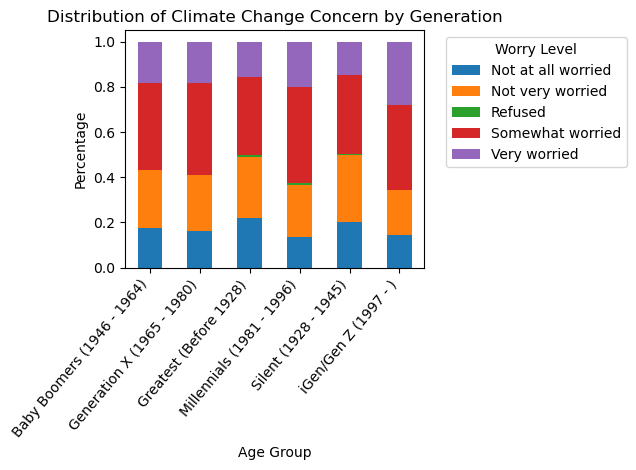

In [4]:
# Creating a stacked bar chart plotting worry vs generation
plt.figure(figsize=(10,6))
climate_df.groupby('generation')['worry'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Climate Change Concern by Generation')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Worry Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.show()

There are a couple of interesting takeaways from this graph. First, Gen Z has the highest proportiuon of any generation of individuals who are very worried about global warming. In general it seems that Millennials and Gen Z members show the highest proportion of individuals in their groups who are at least somewhat worried about climate change. Interestingly, while it does seem that older generations are showing less worry over global warming, there is still a significant amount of individuals in each generation exhibiting at least some level of concern over global warming. Respondent age/generation could be an interesting variable to explore as a predictor of views on climate change.

#### Graph 2: Data Set Distribution of Political Ideologies

The next visualization that I will make is a pie chart showing the distribution of political ideology of all of the participants. Political ideology is well known to be a very big predictor of attitudes towards climate change, so I want to see what the distribution of respondents look like to ensure that representation is decently balanced.

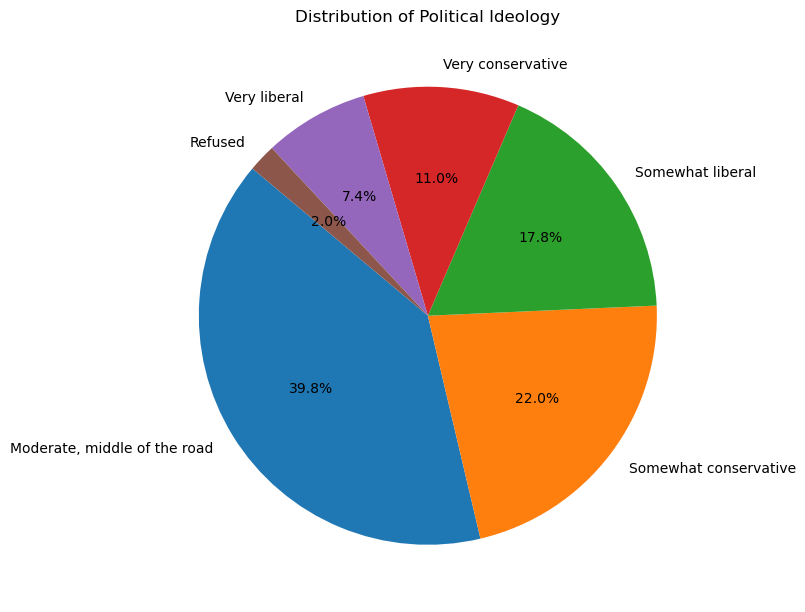

In [5]:
# PLottting a pie chart of political ideology distribution
plt.figure(figsize=(8, 8))
climate_df['ideology'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Political Ideology')
plt.ylabel('')
plt.tight_layout()
plt.show()

Overall this distribution looks very well balanced, particularly when comparing oppostie roups. There are some small imbalances bwrweeb very liberal/very conservative and somewhat conservative/somewhat liberal, but overall they are very comparable. There are also a large proportion of individuals who identify as moderate which outweighs almost every other ideology, so I may need to considier using the weights of each observation to normalize during analysis.

#### Graph 3: Concern Over Personal Harm of Climate Change and Income Level

The next vizualization will look at an individual's concern over climate change impacting them personally and their income level. For this graph I will use the pre categorized income levels and plot a bar chart showing the counts of how individuals responded to the question "How much do you think that global warming will harm you personally?"

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


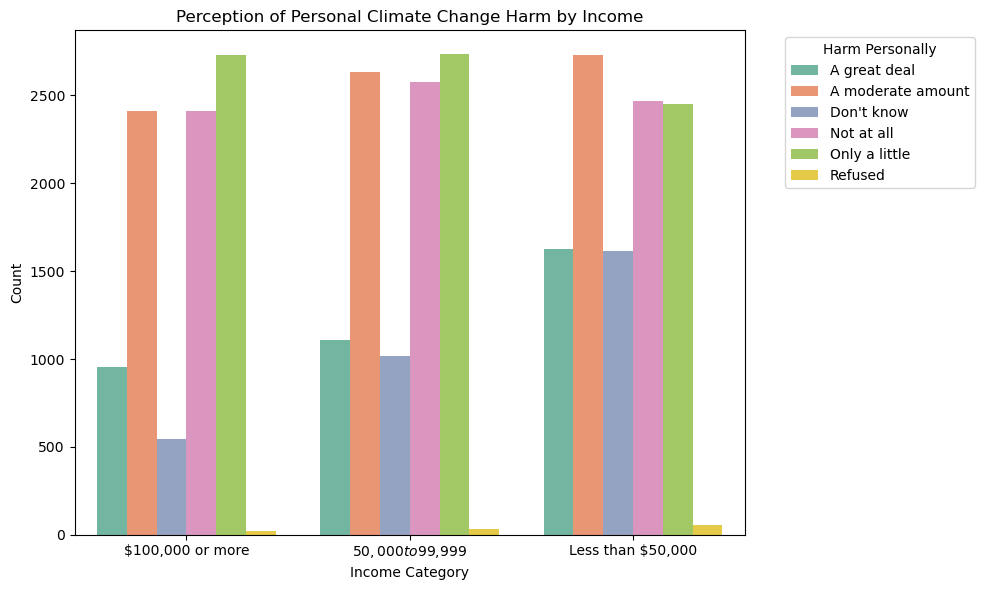

In [6]:
# Plotting a bar chart of response counts to harm_personally variable by income level category
plt.figure(figsize=(10, 6))
sns.countplot(x='income_category', hue='harm_personally', data=climate_df, palette='Set2')
plt.title('Perception of Personal Climate Change Harm by Income')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Harm Personally', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

There are a few takeaways from this visualization. First, it appears that of individuals of the lowest income category have the most number of respondents who think that global warming will harm them a great deal, and individuals in the highest income group seem to be the least likely to think that global warming will harm them a great deal. However, individuals who don't believe global warming will harm them at all are pretty even across the income categories. Indivudials with higher incomes will most likely be more resilient to the impacts of climate change as they have more resources to address these impacts when they occur, so it is possible that people with higher incomes may see global warming as less of a threat than individuals of lower incomes. Based on this graph income could very well be a predictor of attitudes towards climate change.

#### Graph 4: Education Level and Understanding of Scientific Consensus

The last graph I will make will focus on the relationship between an individual's education level and their perception of the consensus from the scientific commmunity on the topic of global warming. As someone within the scientific community, global warming is a widely accepted driver of climate change and is scientifically proven to be accentuated by human activities. Despite it being well studied and documented, there have been individuals who have contested the science over the years which has sent the topic into highly public debates despite the science being sound. Education plays a huge role in an individual's ability to disseminate facts from fiction, especially when it comes to topics with a lot of attention from the popular press. This graph will look at the distribution of responses to a question looking at each person's view on the scientific consensus of global warming.

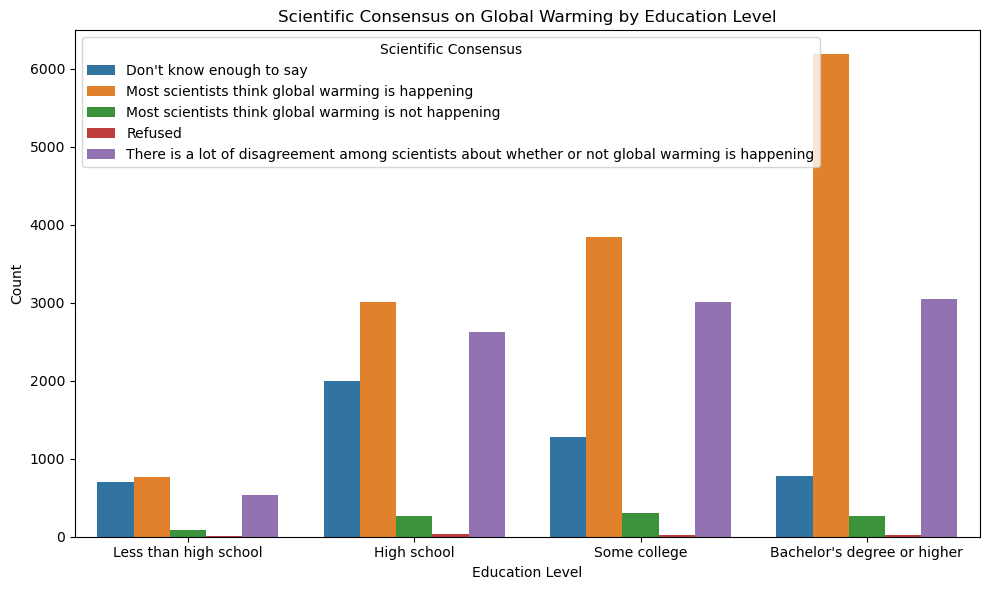

In [7]:
plt.figure(figsize=(10, 6))

# Ordering the education categories for better visualization
education_order = ['Less than high school', 'High school', 'Some college', "Bachelor's degree or higher"]

# Plotting a bar chart of response counts to sci_consensus variable by education level category
sns.countplot(x='educ_category', hue='sci_consensus', data=climate_df, order=education_order)
plt.title("Scientific Consensus on Global Warming by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Scientific Consensus", loc='upper left')
plt.tight_layout()
plt.show()

The first thing to note about this bar chart is that there appear to overall be more respondents of higher education levels than lower education levels, so this variable may have to be weighted. Because of this let's look at a stacked bar chart instead that shows the proportions of each response in the different categories:

C:\Users\krist\AppData\Local\Temp\ipykernel_9816\2584906967.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  climate_df.groupby('educ_category')['sci_consensus'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

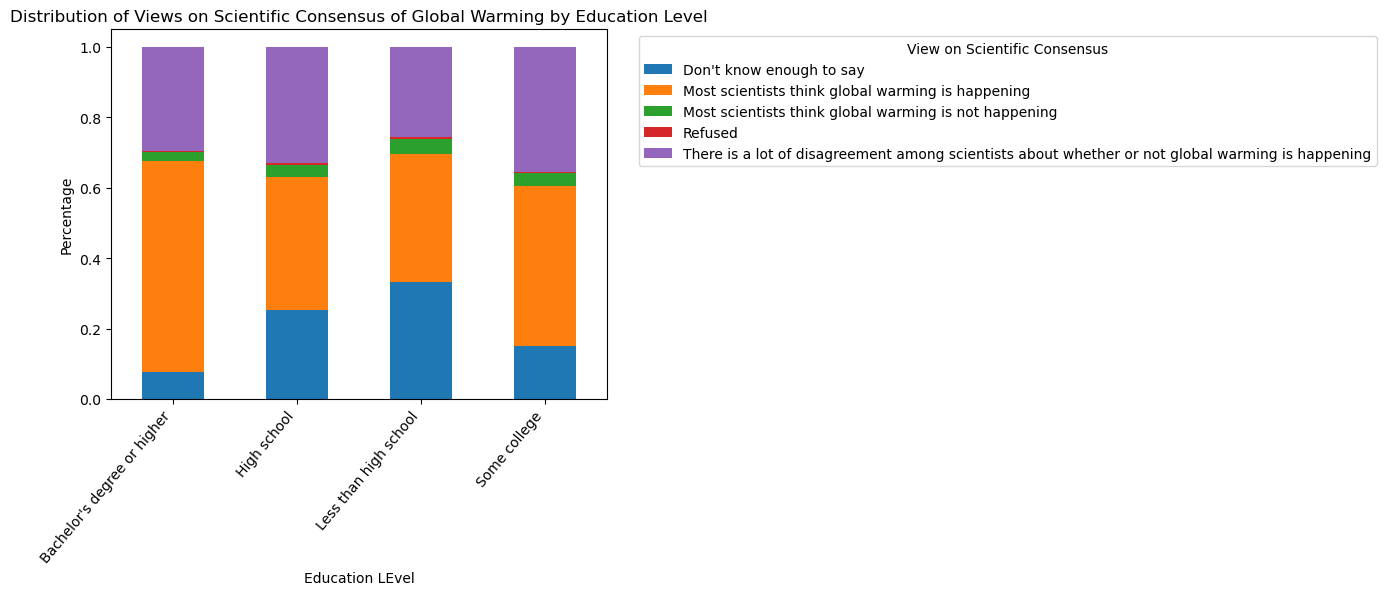

In [8]:
# PLotting stacked bar chart looking at proportions of answers to sci_consensus by education category
plt.figure(figsize=(10,6))
climate_df.groupby('educ_category')['sci_consensus'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Views on Scientific Consensus of Global Warming by Education Level')
plt.xlabel('Education LEvel')
plt.ylabel('Percentage')
plt.legend(title='View on Scientific Consensus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=50, ha="right")
plt.show()

By far though you can see a distinct increase in the proportion of individuals who believe that scientists agree on the existence of global warming as education level increases. Individuals with a high school or some college education had comparable proportions of responses that there is a lot of disagreement within the scientific community. Individuals who felt they did not know enough to say decreased as education level increased, also indicating that education could vertainly influence a person's perceptions on global warming and climate change. Overall, education also appears to be an important variable to consider when modeling what demogrpahic of individuals are most and least likely to acknowledge climate change.

### Conclusions

This data set contains a bunch of different variabels that could serve as important predictors to a person's perception on climate change and related topics such as global warming. This initial graphical anaylysis gave some important insights into the relationships between some of these demographic characteristics of individuals and their perceptions of climate change, and we can see that age, education level, and income level could all be important predictors. I also gained a better understanding of my data, particularly when it came to distribution of respondents belonging to specific demographic groups that will be of focus throughout this project, like political ideologies. From here, I will be able to narrow down the variables of interested and lay the groundwork for building a model that can predict an individual's perceptions of climate change.

## Project Milestone 2

### Introduction

For this data, I plan to build a Random Forest classification model with the target variable fund_research, which asked a person's level of support to fund more research into renewable energy resources, such as solar and wind power. Many businesses are turning towards these energy alternatives not only to align with recent emissions and biodiversity legislation, but also to become leaders in sustainability due to increasing consumer pressure when it comes to sustainable business practices. Understanding how their consumer bases may respond to such changes in these practices is a huge opportunity for companies to caipitalize on these actions and build out sustainability strategies that not only allow them to meet their sustainability goals and align with new mandates, but gain consumer favor in the process. By building a Random Forest classification model, this project aims to uncover which demographic factors, such as age, gender, education, and political affiliation, are most predictive of support for renewable energy research, allowing companies to derive insights about their own consumer base and their attitudes towards funding renewable energy research.

In order to clean the data and prepare it for modeling, I will take a number of different steps including reducing the number of features, handling missing data, one-hot encoding, and feature engineering. 

In [9]:
# Getting shape of initial data frame to check transformation steps throughout cleaning
climate_df.shape

(30136, 54)

#### Step 1: Dropping Initial Unnecessary Columns

The first thing I want to do is reduce the number of features in my data set. To make my data set a little more manageable to work with, I am going to do an initial pass through my variables and trim down some that I know will not be needed.

In [10]:
# Getting an initial list of variables
list(climate_df.columns)

['case_ID',
 'wave',
 'year',
 'weight_wave',
 'weight_aggregate',
 'happening',
 'cause_original',
 'cause_other_text',
 'cause_recoded',
 'sci_consensus',
 'worry',
 'harm_personally',
 'harm_US',
 'harm_dev_countries',
 'harm_future_gen',
 'harm_plants_animals',
 'when_harm_US',
 'reg_CO2_pollutant',
 'reg_utilities',
 'fund_research',
 'reg_coal_emissions',
 'discuss_GW',
 'hear_GW_media',
 'gender',
 'age',
 'age_category',
 'generation',
 'educ',
 'educ_category',
 'income',
 'income_category',
 'race',
 'ideology',
 'party',
 'party_w_leaners',
 'party_x_ideo',
 'registered_voter',
 'region9',
 'region4',
 'religion',
 'religion_other_nonchristian',
 'evangelical',
 'service_attendance',
 'marit_status',
 'employment',
 'house_head',
 'house_size',
 'house_ages0to1',
 'house_ages2to5',
 'house_ages6to12',
 'house_ages13to17',
 'house_ages18plus',
 'house_type',
 'house_own']

In this initial pass, I am going to focus on dropping the following types of variables:

- Non demographic variables that could serve as target variables and skew my chosen target variable (including responses to questions like "level of support of regulating CO2 emisssions", among others)
- Repetitive variables (drop "age", keep "age category", drop "education category", keep "education level", etc.)
- Variables that, according to the metadata, were not asked consistently throughout each wave of the survey from year to year (reg_coal_emissions, harm_plans_animals, etc.)

In [11]:
# Defining columns to drop
columns_to_drop = ['cause_original',
                   'cause_other_text',
                   'weight_wave',
                   'cause_recoded',
                   'sci_consensus',
                   'worry',
                   'harm_US',
                   'harm_personally',
                   'harm_dev_countries',
                   'harm_future_gen',
                   'harm_plants_animals',
                   'reg_CO2_pollutant',
                   'reg_utilities',
                   'when_harm_US',
                   'reg_coal_emissions',
                   'discuss_GW',
                   'hear_GW_media',
                   'age',
                   'educ_category',
                   'religion_other_nonchristian',
                   'service_attendance',
                   'house_size',
                   'house_ages0to1',
                   'house_ages2to5',
                   'house_ages6to12',
                   'house_ages13to17',
                   'house_ages18plus',
                   'region9',
                   'party_w_leaners',
                   'party_x_ideo'
                  ]

In [12]:
# Dropping the previously defined columns and chekcing the data frame
climate_df = climate_df.drop(columns_to_drop, axis=1)
climate_df.head()

,case_ID,wave,year,weight_aggregate,happening,fund_research,gender,age_category,generation,educ,income,income_category,race,ideology,party,registered_voter,region4,religion,evangelical,marit_status,employment,house_head,house_type,house_own
0,2.0,Nov 2008,2008,0.269626,Yes,Strongly support,Female,55+ years,Silent (1928 - 1945),High school graduate - high school diploma or ...,"$50,000 to $59,999","$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,Registered,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",No,Widowed,Not working - retired,Not head of household,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.424411,Don't know,Somewhat support,Male,35-54 years,Baby Boomers (1946 - 1964),10th grade,"$30,000 to $34,999","Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Not registered,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Don't Know,Never married,Not working - disabled,Head of household,Mobile home,Rented
2,5.0,Nov 2008,2008,0.244660,Don't know,Strongly oppose,Female,35-54 years,Baby Boomers (1946 - 1964),Professional or Doctorate degree,"$30,000 to $34,999","Less than $50,000",Hispanic,Somewhat conservative,Republican,Registered,West,Mormon,No,Married,Not working - looking for work,Head of household,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.144799,Yes,Strongly support,Male,55+ years,Silent (1928 - 1945),Master's degree,"$100,000 to $124,999","$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,Registered,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",No,Married,Not working - retired,Head of household,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,0.644106,Yes,Strongly support,Female,18-34 years,Millennials (1981 - 1996),"Some college, no degree","$60,000 to $74,999","$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,Registered,South,Baptist - any denomination,Yes,Married,Working - as a paid employee,Head of household,One-family house detached from any other house,Owned by you or someone in your household


In [13]:
# Checking data frame shape
climate_df.shape

(30136, 24)

#### Step 2: Redefining Income Categories

The next step I want to take is make the inome variables a little more usable. First, it seems like the dollar-signs imported strangely into the dataframe, but in addition the ranges in both income and income category both are not overly usable for the classification that I want to run. Also ,according to the metadata, there seems to have been some reclassification of income ranges in more recent waves of the survey, so I want to define a new variable with more normalized income categories to assign respondents based on the lower bounds of their income ranges.

In [14]:
# Importing re and numpy
import re
import numpy as np

In [15]:
climate_df['income'].dtype

CategoricalDtype(categories=[                                                                        99.0,
                                                                          '$10,000 to $12,499',
                                                                        '$100,000 to $124,999',
                                                                          '$12,500 to $14,999',
                                                                        '$125,000 to $149,999',
                                                                          '$15,000 to $19,999',
                                                                        '$150,000 to $174,999',
                  '$175,000 to $199,999 (Nov 2016 on); $175,000 or more (Nov 2008 - Mar 2016)',
                                                                          '$20,000 to $24,999',
                                                          '$200,000 to $249,999 (Nov 2016 on)',
                             

In [16]:
# Defining new income categories based on income range lower bounds
income_categories = {
    'Low Income': [0, 34999],
    'Lower Middle Income': [35000, 49999],
    'Middle Income': [50000, 99999],
    'Upper Middle Income': [100000, 174999],
    'High Income': [175000, float('inf')],
}

In [17]:
# Defining a function to extract the lower income range lower bounds
def extract_lower_bound(income_range):
    # Use regex to find all numeric sequences and strip special characters
    numeric_values = re.findall(r'\d+', income_range.replace(',', ''))
    # If numeric values founf, return them as integers
    if numeric_values:
        return int(numeric_values[0])
    return None

In [18]:
# Defining a function to map the lower income range bound to the previously defined categories
def map_to_income_category(lower_bound):
    # If no lower bound found, return nan
    if lower_bound is None:
        return np.nan
    
    # Looping through income categories
    for category, bounds in income_categories.items():
        # Checking if the lower bound falls within the current category's range - if so, return category
        if bounds[0] <= lower_bound <= bounds[1]:
            return category
    # Return NaN if no category matches
    return np.nan

In [19]:
# Changing income column to dtype string instead of category
climate_df['income'] = climate_df['income'].astype(str)

# Applying lower_bound function to income column of data frame
climate_df['lower_bound'] = climate_df['income'].apply(extract_lower_bound)

# Applying the mapping function to map the lower bound to income categories into a new income_range column
climate_df['income_range'] = climate_df['lower_bound'].apply(map_to_income_category)

# Dropping the original two income categories from data frame
climate_df = climate_df.drop(['income', 'income_category', 'lower_bound'], axis=1)

# Checking the data frame with new income_range column
climate_df.head()

,case_ID,wave,year,weight_aggregate,happening,fund_research,gender,age_category,generation,educ,race,ideology,party,registered_voter,region4,religion,evangelical,marit_status,employment,house_head,house_type,house_own,income_range
0,2.0,Nov 2008,2008,0.269626,Yes,Strongly support,Female,55+ years,Silent (1928 - 1945),High school graduate - high school diploma or ...,"White, Non-Hispanic",Somewhat conservative,Republican,Registered,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",No,Widowed,Not working - retired,Not head of household,One-family house detached from any other house,Owned by you or someone in your household,Middle Income
1,3.0,Nov 2008,2008,0.424411,Don't know,Somewhat support,Male,35-54 years,Baby Boomers (1946 - 1964),10th grade,"White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Not registered,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Don't Know,Never married,Not working - disabled,Head of household,Mobile home,Rented,Low Income
2,5.0,Nov 2008,2008,0.244660,Don't know,Strongly oppose,Female,35-54 years,Baby Boomers (1946 - 1964),Professional or Doctorate degree,Hispanic,Somewhat conservative,Republican,Registered,West,Mormon,No,Married,Not working - looking for work,Head of household,One-family house detached from any other house,Owned by you or someone in your household,Low Income
3,6.0,Nov 2008,2008,0.144799,Yes,Strongly support,Male,55+ years,Silent (1928 - 1945),Master's degree,"White, Non-Hispanic",Somewhat conservative,Independent,Registered,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",No,Married,Not working - retired,Head of household,One-family house detached from any other house,Owned by you or someone in your household,Upper Middle Income
4,7.0,Nov 2008,2008,0.644106,Yes,Strongly support,Female,18-34 years,Millennials (1981 - 1996),"Some college, no degree","White, Non-Hispanic",Somewhat conservative,Republican,Registered,South,Baptist - any denomination,Yes,Married,Working - as a paid employee,Head of household,One-family house detached from any other house,Owned by you or someone in your household,Middle Income


In [20]:
# Checking data frame shape
climate_df.shape

(30136, 23)

#### Step 3: Checking for and handling missing values

My next step is to check my reduced data frame for missing values. To do this, I am going to get a sum of all of the missing values by category and first see where the holes in my data are.

In [21]:
# Getting counts of missing values in each column
missing_counts = climate_df.isna().sum()

# Displaying the count of missing values for each column
print("Missing values by column:")
print(missing_counts)

Missing values by column:
case_ID                0
wave                   0
year                   0
weight_aggregate       0
happening              0
fund_research          0
gender                 0
age_category           0
generation             0
educ                   0
race                   0
ideology               0
party                  0
registered_voter       0
region4                0
religion               0
evangelical            0
marit_status        3061
employment          3061
house_head          3061
house_type          3061
house_own              0
income_range           0
dtype: int64


It looks like marital status, employment, whether the respondent is the head of the house, and the house type are all missing the same number of values. Based on the metadata, I already know that these were responses from survey years 2021 and 2022 that seem to be missing this data. Because this missing data includes all respondents from those years, I am choosing to drop those years from analysis as these are important features to include in the model. I am further justifying the drop in the case that dropping toughly 3,000 rows will still leave me with a sizeable data set with over 25,000 respondents to train and test a model with. 

In [22]:
# Dropping rows with missing values in marit_status, employment, house_head, and house_type variables
climate_df = climate_df.dropna(subset=['marit_status', 'employment', 'house_head', 'house_type'])

In [23]:
# Checking missing counts again after dropping rows
missing_counts = climate_df.isna().sum()

# Displaying the count of missing values for each column
print("Missing values by column::")
print(missing_counts)

Missing values by column::
case_ID             0
wave                0
year                0
weight_aggregate    0
happening           0
fund_research       0
gender              0
age_category        0
generation          0
educ                0
race                0
ideology            0
party               0
registered_voter    0
region4             0
religion            0
evangelical         0
marit_status        0
employment          0
house_head          0
house_type          0
house_own           0
income_range        0
dtype: int64


In [24]:
# Checking data frame shape
climate_df.shape

(27075, 23)

#### Step 4: Simplifying Target Variable (added during Milestone 3):

In order to simplify my model, I am going to turn my target variable of fund_research into a binary variable looking at whether or not an individual overall supported funding research or opposed it. To do that, I am going to combine "somewhat" and "strongly" oppose into just "oppose," and do the same for support. I will also drop rows where individuals refused to answer this question as those individuals really do not add any value to what I am looking at.

In [25]:
# Checkign unique categories of the find_research variable
climate_df['fund_research'].unique()

['Strongly support', 'Somewhat support', 'Strongly oppose', 'Somewhat oppose', 'Refused']
Categories (5, object): ['Refused', 'Somewhat oppose', 'Somewhat support', 'Strongly oppose', 'Strongly support']

In [26]:
# Dropping rows where fund_research='Refused'
climate_df = climate_df[climate_df['fund_research'] != 'Refused']

In [27]:
# Redefining the categories of this variable to remove 'Refused'
climate_df['fund_research'] = pd.Categorical(climate_df['fund_research'], categories=['Somewhat support', 'Strongly support', 
                                                                                      'Somewhat oppose', 'Strongly oppose'])

In [28]:
# Checking the redefined catefgories to ensure 'Refused' was removed
climate_df['fund_research'].unique()

['Strongly support', 'Somewhat support', 'Strongly oppose', 'Somewhat oppose']
Categories (4, object): ['Somewhat support', 'Strongly support', 'Somewhat oppose', 'Strongly oppose']

In [29]:
# Combining classes into just 'Support' or 'Oppose'
climate_df['fund_research_combined'] = climate_df['fund_research'].replace({
    'Somewhat support': 'Support',
    'Strongly support': 'Support',
    'Somewhat oppose': 'Oppose',
    'Strongly oppose': 'Oppose'
})

In [30]:
# Checking the data frame
climate_df.head()

,case_ID,wave,year,weight_aggregate,happening,fund_research,gender,age_category,generation,educ,race,ideology,party,registered_voter,region4,religion,evangelical,marit_status,employment,house_head,house_type,house_own,income_range,fund_research_combined
0,2.0,Nov 2008,2008,0.269626,Yes,Strongly support,Female,55+ years,Silent (1928 - 1945),High school graduate - high school diploma or ...,"White, Non-Hispanic",Somewhat conservative,Republican,Registered,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",No,Widowed,Not working - retired,Not head of household,One-family house detached from any other house,Owned by you or someone in your household,Middle Income,Support
1,3.0,Nov 2008,2008,0.424411,Don't know,Somewhat support,Male,35-54 years,Baby Boomers (1946 - 1964),10th grade,"White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Not registered,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Don't Know,Never married,Not working - disabled,Head of household,Mobile home,Rented,Low Income,Support
2,5.0,Nov 2008,2008,0.244660,Don't know,Strongly oppose,Female,35-54 years,Baby Boomers (1946 - 1964),Professional or Doctorate degree,Hispanic,Somewhat conservative,Republican,Registered,West,Mormon,No,Married,Not working - looking for work,Head of household,One-family house detached from any other house,Owned by you or someone in your household,Low Income,Oppose
3,6.0,Nov 2008,2008,0.144799,Yes,Strongly support,Male,55+ years,Silent (1928 - 1945),Master's degree,"White, Non-Hispanic",Somewhat conservative,Independent,Registered,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",No,Married,Not working - retired,Head of household,One-family house detached from any other house,Owned by you or someone in your household,Upper Middle Income,Support
4,7.0,Nov 2008,2008,0.644106,Yes,Strongly support,Female,18-34 years,Millennials (1981 - 1996),"Some college, no degree","White, Non-Hispanic",Somewhat conservative,Republican,Registered,South,Baptist - any denomination,Yes,Married,Working - as a paid employee,Head of household,One-family house detached from any other house,Owned by you or someone in your household,Middle Income,Support


#### Step 5: One-Hot Encoding Categorical Features

The next thing I will do to prepare my data for modeling is create dummy variables of all of my features. This will help convert all of my features into binary variables that the random forest classifier model can interpret. Since I am keeping some reference variables in my data frame that will not be features that I want the model to consider, I will first make a list of features I want to encode and use that list to create my dummy variables for those features.

In [31]:
# Defining the categorical variables to one-hot encode
categorical_columns = ['gender', 'age_category', 'generation', 'educ', 
                       'race', 'ideology', 'party',  
                       'registered_voter', 'region4', 'religion', 'evangelical', 
                       'marit_status', 'employment', 'house_head', 'house_type', 'house_own', 'income_range', 'fund_research_combined']

In [32]:
# Using pd.get_dummies to transform all previously defined columns into dummy variables
climate_df = pd.get_dummies(climate_df, columns=categorical_columns, drop_first=True)

In [33]:
# Checking the data frame to ensure encoding occurred properly
climate_df.head()

,case_ID,wave,year,weight_aggregate,happening,fund_research,gender_Male,age_category_35-54 years,age_category_55+ years,generation_Generation X (1965 - 1980),generation_Greatest (Before 1928),generation_Millennials (1981 - 1996),generation_Silent (1928 - 1945),generation_iGen‎/Gen Z (1997 - ),educ_10th grade,educ_11th grade,educ_12th grade no diploma,"educ_1st, 2nd, 3rd, or 4th grade",educ_5th or 6th grade,educ_7th or 8th grade,educ_9th grade,educ_Associate's degree,educ_Bachelor's degree,educ_High school graduate - high school diploma or the equivalent (GED),educ_Master's degree,educ_No formal education,educ_Professional or Doctorate degree,"educ_Some college, no degree",race_Hispanic,"race_Other, Non-Hispanic","race_White, Non-Hispanic",ideology_Refused,ideology_Somewhat conservative,ideology_Somewhat liberal,ideology_Very conservative,ideology_Very liberal,party_Independent,party_No party/not interested in politics,party_Other; Please specify:,party_Refused,party_Republican,registered_voter_Not registered,registered_voter_Not sure,registered_voter_Prefer not to answer,registered_voter_Refused,registered_voter_Registered,region4_Northeast,region4_South,region4_West,religion_Atheist (Apr 2014 on),religion_Baptist - any denomination,religion_Buddhist,religion_Catholic,religion_Eastern Orthodox,religion_Hindu,religion_Jewish,religion_Mormon,religion_Muslim,religion_None of the Above (Apr 2014 on); None (Nov 2008 - Dec 2013),religion_Other - non-Christian (Please specify),religion_Other Christian,religion_Pentecostal,"religion_Protestant (e.g., Methodist, Lutheran, Presbyterian, Episcopal)",religion_Refused,evangelical_Don't Know,evangelical_No,evangelical_Refused,evangelical_Yes,marit_status_Living with partner,marit_status_Married,marit_status_Never married,marit_status_Separated,marit_status_Widowed,employment_Not working - looking for work,employment_Not working - on temporary layoff from a job,employment_Not working - other,employment_Not working - retired,employment_Working - as a paid employee,employment_Working - self-employed,house_head_Not head of household,house_type_Building with 2 or more apartments,house_type_Mobile home,house_type_One-family house attached to one or more houses (such as a condo or townhouse),house_type_One-family house detached from any other house,house_own_Owned by you or someone in your household,house_own_Rented,income_range_Low Income,income_range_Lower Middle Income,income_range_Middle Income,income_range_Upper Middle Income,fund_research_combined_Oppose
0,2.0,Nov 2008,2008,0.269626,Yes,Strongly support,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,True,False,False
1,3.0,Nov 2008,2008,0.424411,Don't know,Somewhat support,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False
2,5.0,Nov 2008,2008,0.244660,Don't know,Strongly oppose,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,

In [34]:
# Checking the shape of the data frame
climate_df.shape

(26504, 91)

#### Step 6: Splitting the Data into Training and Test Sets

For my last preparation step, I am going to split my data into training and test sets in anticipation of modeling in the next milestone. I am going to sttart with a 70% training and 30% test split and see how my model performs with this ratio since there is a good amount of data in my data set. I am also going to ensure that my reference variables are kept separate from the features, so I will be dropping them along with the target variable from my features. 

In [35]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [36]:
# Defining target variable
target = 'fund_research_combined_Oppose'
# Making a list of non-feature columns to drop (reference variables)
non_feature_columns = ['case_ID', 'wave', 'year', 'weight_aggregate', 'happening', 'fund_research']
# Defining features (droppinng reference and target variable)
features = climate_df.columns.drop(non_feature_columns).drop(target)

In [37]:
# Using train, test, split to split into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(
    climate_df[features],
    climate_df[target],
    test_size=0.2,
)

In [38]:
# Checking the shapes of the training and test sets to validate split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21203, 84)
Shape of X_test: (5301, 84)
Shape of y_train: (21203,)
Shape of y_test: (5301,)


### Summary

In this milestone, I cleaned, transformed, and prepared my data for the next stage of modeling. Being that I am working with a lot of categorical variables, I chose to go with a random forest classifer model and prepared my data accordingly to train that kind of model. This included handling all missing values, dropping unnecessary variables, and one-hot encoding all of my features so the model can understand them. In addition, I also close to engineer my income feature and create a new variable that assigns an income category to each respondent depending on the income range that they fell under. This step helped to better align the format of the income variable with the format of the other features that will be used in the model. After performing all of those steps, I then split my data into training and test sets, choosing a 70% training and 30% testing split since my sample size is rather large. My data is now processed, split, and ready to be fitted to a model in the next milestone.

At the end of the next milestone, my goal is to build a model that uses the demographic features of each respondent to predict their attitudes towards funding renewable energy research. While my data has been now been prepared to be fit to a random forest classifier, that is not to say that certain preprocessing steps may need to be revisited as I progress. Data preparation is a very fluid process, and there is potential that some of these steps may need to be revised as I begin to build out and evaluate my model, especially if I choose to pivot routes for the model that I choose. 

## Project Milestone 3: 

### Introduction

The model I have selected for this data is a Random Forest Classifier model. There are a number of benefits that I see for using a random forest for this particular data:

1. Robustness: Even after cleaning the data, there are still a lot of features that could potentially add additional noise to the data. Random forests are robust when dealing with this noise, commpiling trees of random subsets of features that allow it to hold up better to the risk of overfitting due to noisy features.
2. Handling of Complex Relationships: My data has a lot of features that more than likely have complex relationships with the target and eachother from what my initial graphical analysis indicates, and Random Forests have a great ability to handle these complex relationships.
3. Ability to Handle Imbalanced Classes: Because of their ensemble nature, random forests are also able to better navigate imbalanced classes especially when combined with techniques like upsampling. Knowing my target variable is highly unbalanced, choosing a model with these capabilities is important.

In order to simplyfy my modeling, I revisited a few data preparation steps in milestone 2 and further cleaned up my data. Most notable, I reduced the categories of my feature variable down to two, combining "strongly oppose" and "somewhat oppose" responses into just "oppose" and "strongly support" and "somewhat support" to just "support." Rows that refused to answer whether or not they supported funding of global warming research were dropped. For more details, see step 4 in the previous milestone. This allowed me to one-hot encode my target . 

To start the proces of building a model, I am first going to see how a Random Forest Classifier will handle my imbalanced data with using the class_weights parameter in the random forest model.

#### Building a Random Forest Classifier

In [39]:
# Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_recall_fscore_support

In [40]:
# Initializing RF Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced')
# Fitting model to training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [41]:
# Using the model to predict on the test set
y_pred = rf_classifier.predict(X_test)

In [42]:
# Calculating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

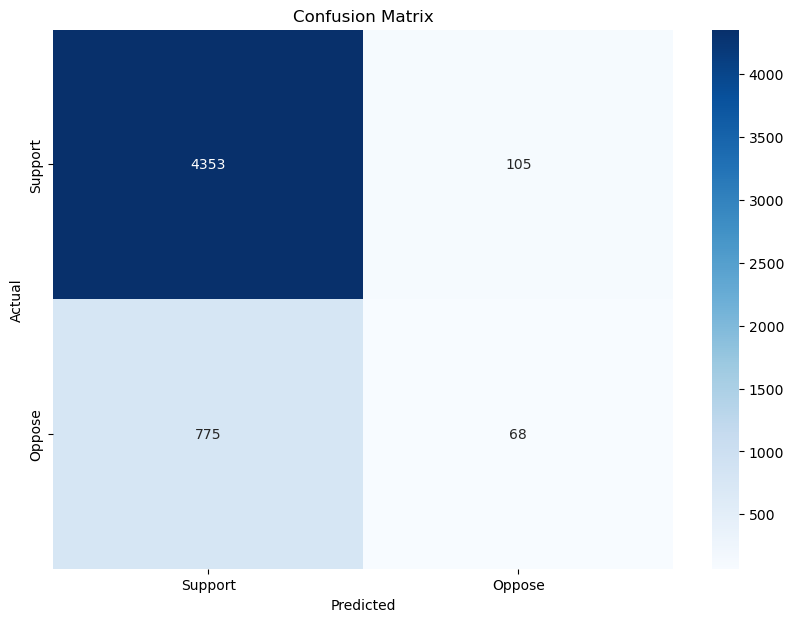

In [43]:
# Plotting the confusion matrix
class_labels = ['Support', 'Oppose']
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Retrieving a classification report and calculating accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.98      0.91      4458
        True       0.39      0.08      0.13       843

    accuracy                           0.83      5301
   macro avg       0.62      0.53      0.52      5301
weighted avg       0.78      0.83      0.79      5301

Accuracy: 0.8340


Here are the major takeaways from this initial model:
- The model performed very well for the majority class (precision=0.85, recall=0.98, and f1=0.91). This shows that 85% of instances predicted as supporting research were correctly identifed and 98% of instances that actually supported research were correctly identified, leading to a high overall f1-score of 0.91.
- The model did not perform well for the minority class (precision=0.39, recall=0.08, and f1-score=0.13). For this class, only 39% of instances predicted as opposing funding research were correctly identified and 8% of instances that actually opposed research were correctly identified. 
- Both of these conclusions are supported by the confusion matrix.
- While accuracy is high, this metric is highly skewed by the majority class so it is not an accurate evaluation for this model.


To continue with a Random Forest model, I will have to further balance the target variable classes in my target in order to increase overall model performance. My goal is to get a model that is good at both identifying individuals most likely to support funding research and oppose it, so this one sided model will have to be improved. Next, I am going to balance my target a little better by upsampling the minority class.

#### Up-sampling to Balance Classes

To up-sample the minority class, I don't want to swing too far the other way and duplicate too many values at the risk of overfitting. I am choosing to increase the minortiy class to roughly double (8000) and see how well the model performs from there.

In [46]:
# Importing necessary packages
from sklearn.utils import resample

In [48]:
# Specifying the desired number of samples for the minority class
desired_minority_samples = 8000

# Separating majority and minority classes using the trget variable
majority_class = climate_df[climate_df['fund_research_combined_Oppose'] == False]
minority_class = climate_df[climate_df['fund_research_combined_Oppose'] == True]

# Up-sampling the minority class to the desired number of samples
minority_class_upsampled = resample(minority_class,
                                    replace=True, 
                                    n_samples=desired_minority_samples)

In [49]:
# Combining majority class with up-sampled minority class
upsampled_df = pd.concat([majority_class, minority_class_upsampled])

# Displaying the class counts to check up-sampling
print(upsampled_df['fund_research_combined_Oppose'].value_counts())

fund_research_combined_Oppose
False    22237
True      8000
Name: count, dtype: int64


#### Splitting Trainig and Test Sets with Up-Sampled Data:

In [50]:
# Defining target variable
target = 'fund_research_combined_Oppose'
# Making a list of non-feature columns to drop (reference variables)
non_feature_columns = ['case_ID', 'wave', 'year', 'weight_aggregate', 'happening', 'fund_research']
# Defining features (droppinng reference and target variable)
features = upsampled_df.columns.drop(non_feature_columns).drop(target)

In [51]:
# Using train, test, split to split into 80% training and 20% test sets
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(
    upsampled_df[features],
    upsampled_df[target],
    test_size=0.2,
)

In [52]:
# Checking the shapes of the training and test sets to validate split
print("Shape of X_train_up:", X_train_up.shape)
print("Shape of X_test_up:", X_test_up.shape)
print("Shape of y_train_up:", y_train_up.shape)
print("Shape of y_test_up:", y_test_up.shape)

Shape of X_train_up: (24189, 84)
Shape of X_test_up: (6048, 84)
Shape of y_train_up: (24189,)
Shape of y_test_up: (6048,)


#### Re-running Random Forest Model with Up-Sampled Data:

In [53]:
# Initializing RF Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced')
# Fitting the classifier to the up-sampled training data
rf_classifier.fit(X_train_up, y_train_up)

RandomForestClassifier(class_weight='balanced')

In [54]:
# Using the model to predict on the test up-sampled data set
y_pred_up = rf_classifier.predict(X_test_up)

In [55]:
# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test_up, y_pred_up)

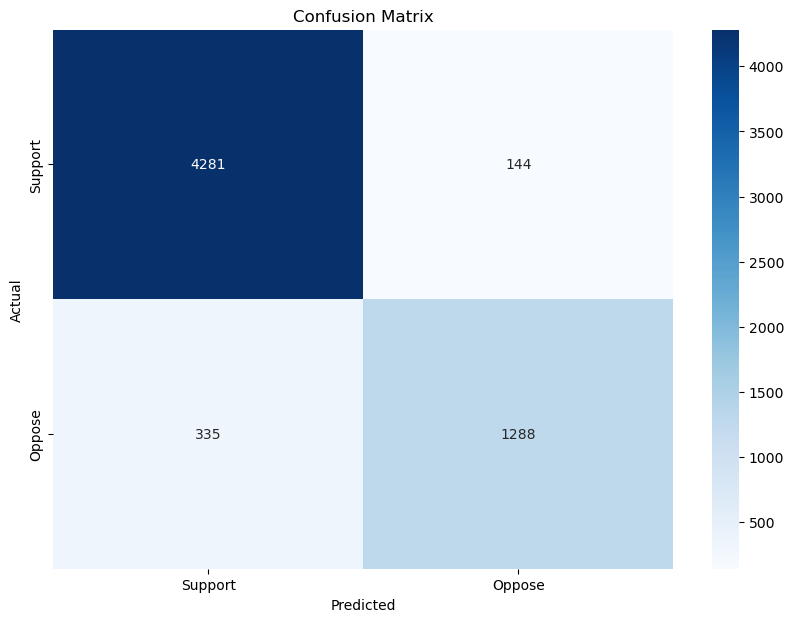

In [59]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# Retrieving a classification report and calculating accuracy
print("Classification Report:")
print(classification_report(y_test_up, y_pred_up))

# Calculating accuracy score
accuracy = accuracy_score(y_test_up, y_pred_up)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      4425
        True       0.90      0.79      0.84      1623

    accuracy                           0.92      6048
   macro avg       0.91      0.88      0.90      6048
weighted avg       0.92      0.92      0.92      6048

Accuracy: 0.9208


In [61]:
from sklearn.metrics import roc_curve, auc

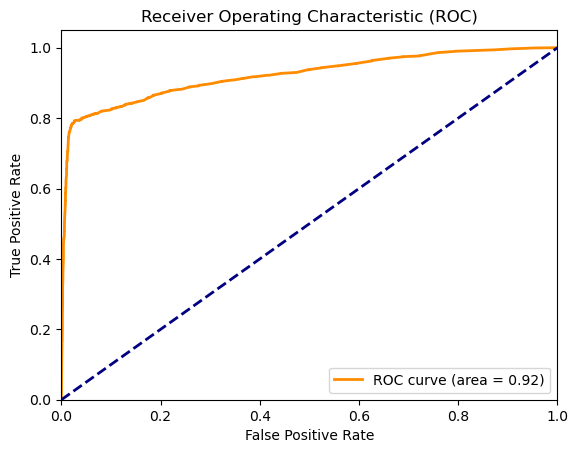

In [62]:
# Getting the predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(X_test_up)[:, 1]

# Calculating ROC curve and ROC curve area
fpr, tpr, _ = roc_curve(y_test_up, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

After up-samling the minority class, there is a significant increase in model performance particularly with predicting the minority class (individuals who oppose funding research). Here are the major conclusions from this model:

- Model performance for the majority class remained relatively the same.
- For the minority class, precision increased to  0.90, recall to 0.79, and f1-score to 0.84, improving the overall macro (unweighted) f1-score of the model to 0.90 as opposed to the original model's 0.52. 
- With more balanced classes, we still see the accuracy increase to 0.92. While this is not the main metric being used to evaluate this model due to the imbalanced classes, it still confirms a significant increase in model performance and a well-performing model.
- The ROC curve further indicates a well performing model, indicating a better performance than random guessing with a high AUC value.
- While the confusion matrix is not perfect and still indicates some false positive and false negative predictions, the are relatively low compared to the true predictions and are more than acceptable discrepencies for the nature of this data.

### Conclusions

In this milestone, I fitted a Random Forest Classifer to my data and handled imbalanced classes by up-sampling my minority class. By doing so, I was able to increase precision on the minority class by about 50%, recall by about 70%, and overall unweighted f1 score of the model to almost 40%. These evaluation metrics were chosen to focus on over accuracy due to the fact that I was dealing with imbalanced classes and accuracy would be highly influenced by the original model's good predictive modeling of the majority class. I chose to no more than double the minority class during up-scaling instead of scaling to match the majority class exactly, decreasing the chance of overfitting by introducing less duplicates into the resampled data set. This led to an extremely well performing model that generalizes excellently to unseen data and has more than acceptable rates of predictive error for this kind of data. Overall, the Random Forest Classifier has been fitted and tuned to accurately predict whether or not a person is likely to support or oppose the funding of global warming research based on their demographic characteristics.